In [2]:
#  importing the required libraries

In [8]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
# function for reading the image 
# this image is taken from a video
# and the video is taken from a thermal camera
# converting image from BGR to RGB

In [15]:
def read_image(image_path):
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [16]:
# thermal camera takes the heat/thermal energy
# more heat means the pixel value is closer to 255
# if it is cool then pixel value is closer to 0
# displaying the image, where white portion means that part is having more temprature
# and vice versa

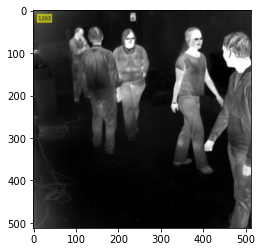

In [17]:
image = read_image("thermal_scr_img.png")
plt.imshow(image)

In [ ]:
# converting the image into grayscale
# changing and applying the ColorMap, black and white to black and red

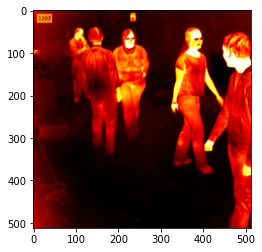

In [20]:
heatmap_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
heatmap = cv2.applyColorMap(heatmap_gray, cv2.COLORMAP_HOT)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

plt.imshow(heatmap)

In [ ]:
# now taking the heatmap_gray and converting it to black and white image
# and performing threshold operation
# the pixels having values more than 200 will become white pixels and the one having values less than 200 will become black pixels

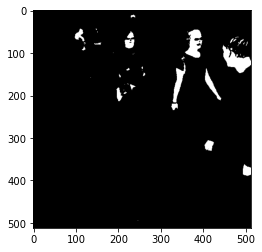

In [21]:
heatmap_gray = cv2.cvtColor(heatmap, cv2.COLOR_RGB2GRAY)
ret, binary_thresh = cv2.threshold(heatmap_gray, 200, 255, cv2.THRESH_BINARY)
plt.imshow(binary_thresh, cmap='gray')

In [ ]:
# then cleaning the small white pixels to calculate the temperature for bigger blocks/portions of the image
# doing erosion operation by taking binary threshold (it  makes image pixels thinner)
# doing dilution operation by taking the image erosion (and then that's why we are removing/cleaning all small pixels)
# kernel is some kind of filter and it changes the values of these pixels 

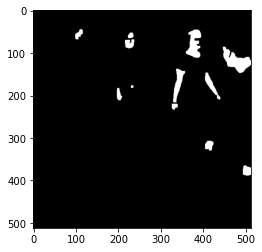

In [25]:
kernel = np.ones((5,5), np.uint8)
image_erosion = cv2.erode(binary_thresh, kernel, iterations=1)
image_opening = cv2.dilate(image_erosion, kernel, iterations=1)

plt.imshow(image_opening, cmap='gray')

In [ ]:
# now creating some masks
# using function zeros_like() it will take all the structures like zero
# x, y, w, h are the coordinate for rectangle
# copying the small rectangle part from this image using mask
# and printing the avg. value of pixels to get the temperature

(234.61660079051381, 0.0, 0.0, 0.0)


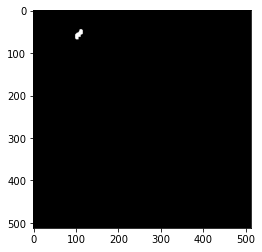

In [26]:
contours, _ = cv2.findContours(image_opening, 1, 2)

contour = contours[11]
mask = np.zeros_like(heatmap_gray)
x, y, w, h = cv2.boundingRect(contour)
mask[y:y+h, x:x+w] = image_opening[y:y+h, x:x+w]
print(cv2.mean(heatmap_gray, mask= mask))
plt.imshow(mask, cmap='gray')

In [ ]:
# performing the bitwise and operator on heatmap
# here we have created not mask

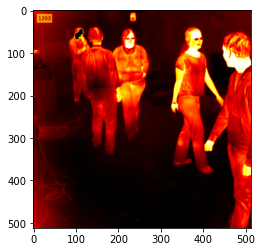

In [27]:
masked = cv2.bitwise_and(heatmap, heatmap, mask=~mask)
plt.imshow(masked)

In [ ]:
# displaying the heatmap_gray

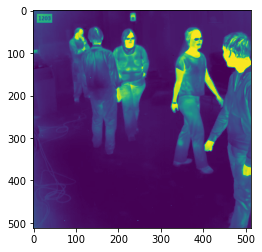

In [28]:
plt.imshow(heatmap_gray)

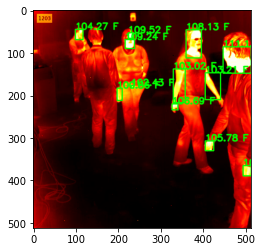

In [31]:
image_with_rectangles = np.copy(heatmap)

for contour in contours:
    # rectangle over each contour
    x, y, w, h = cv2.boundingRect(contour)
    
    # mask is boolean type of matrix
    mask = np.zeros_like(heatmap_gray)
    mask[y:y+h, x:x+w] = image_opening[y:y+h, x:x+w]
    
    # temperature calculation
    temp = round(cv2.mean(heatmap_gray, mask=mask)[0] / 2.25, 2)
    
    # draw rectangles for visualisation
    image_with_rectangles = cv2.rectangle(
        image_with_rectangles, (x,y), (x+w, y+h), (0, 255, 0), 2)
    
    # write temperature for each rectangle
    cv2.putText(image_with_rectangles, f"{temp} F", (x,y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)
    
    plt.imshow(image_with_rectangles)